# HW5 Transfer Learning

This notebook uses the Intel Image Classification dataset from Kaggle

- I've commented out the parts that you won't need to run again once you run them the first time

## Question 1

Importing the data, intel image

### 1. 
Just like the way we did it in class (Module 5- Python 3 notebook), go to the KaggleLinks to an external site. website and download the data

In [45]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [46]:
# !kaggle datasets download 'puneet6060/intel-image-classification'

In [47]:
# unzip intel-image-classification.zip -d ./intel_image_classification

### 2. 

You need to make the relevant directories (train, validation, test) and copy images from the original directory (train folder:seg_train/seg_train) to this new subdirectories you just created. Make sure you copy 1000 images of each class for the train, 500 for validation and 500 images for the test data directory

In [48]:
# import os, shutil, pathlib

# new_base_dir = pathlib.Path("intel_image_classification")

# def make_subset(subset_name, count):
#     for category in ("buildings", "forest", "glacier", "mountain", "sea", "street"):
#       src_folder = pathlib.Path("/home/clatacis88/intel_image_classification/seg_train/seg_train/"+category)
#       file_list = os.listdir(src_folder)[:count]
#       dst_folder = new_base_dir / subset_name / category
#       os.makedirs(dst_folder)

#       for file_name in file_list:
#         src_file = os.path.join(src_folder, file_name)
#         dst_file = os.path.join(dst_folder, file_name)
#         shutil.move(src_file, dst_file)


# make_subset("train", count=1000)
# make_subset("validation", count=500)
# make_subset("test", count=500)

In [49]:
# # count the number of images in the train folder
# train_dir = new_base_dir / "train"
# for category in ("buildings", "forest", "glacier", "mountain", "sea", "street"):
#   print(category, len(os.listdir(train_dir / category)))

### 3.  

Using the image_dataset_from_directory() function from tensorflow.keras.util, reshape your images into 180*180 size and batches of size 32. You should create 3 data sets. Train_dataset, Validation_dataset and Test_dataset. If you do this step correctly, you should see something like this:

- Found 6000 files belonging to 6 classes.
- Found 3000 files belonging to 6 classes.
- Found 3000 files belonging to 6 classes.

In [50]:
# from tensorflow.keras.utils import image_dataset_from_directory

# train_dataset = image_dataset_from_directory(
#     new_base_dir / "train",
#     image_size=(180, 180),
#     batch_size=32)

# validation_dataset = image_dataset_from_directory(
#     new_base_dir / "validation",
#     image_size=(180, 180),
#     batch_size=32)

# test_dataset = image_dataset_from_directory(
#     new_base_dir / "test",
#     image_size=(180, 180),
#     batch_size=32)

In [51]:
for images, labels in train_dataset.take(1):
    print(labels.numpy())

[4 3 4 2 0 5 2 4 4 0 5 1 4 4 4 2 1 3 3 4 5 0 1 1 4 4 1 4 0 4 5 2]


2024-10-24 20:14:17.624872: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


The labels are integers

## Question 2

Building the benchmark CNN

In [52]:
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
def CNN_builder():
  inputs = keras.Input(shape=(180, 180, 3), name='Input')
  x = layers.Rescaling(1./255, name='rescaling')(inputs)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", name='conv_layer1')(x)
  x = layers.MaxPooling2D(pool_size=2 , name='pooling1')(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu" , name='conv_layer2')(x)
  x = layers.MaxPooling2D(pool_size=2, name='pooling2')(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", name='conv_layer3')(x)
  x = layers.MaxPooling2D(pool_size=2, name='pooling3')(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", name='conv_layer4')(x)
  x = layers.MaxPooling2D(pool_size=2, name='pooling4')(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", name='conv_layer5')(x)
  x = layers.Flatten()(x)

  outputs = layers.Dense(6, activation="softmax" , name='output')(x)

  model = keras.Model(inputs=inputs, outputs=outputs, name='base_CNN')

  model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [54]:
model = CNN_builder()
model.summary()

Model: "base_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer1 (Conv2D)            │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling1 (MaxPooling2D)         │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer2 (Conv2D)            │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling2 (MaxPooling2D)         │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer3 (Conv2D)            │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling3 (MaxPooling2D)         │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer4 (Conv2D)            │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling4 (MaxPooling2D)         │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer5 (Conv2D)            │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 6)              │        75,270 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,053,766 (4.02 MB)

 Trainable params: 1,053,766 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

### Model Fit

In [55]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="CNN_benchmark.keras",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [56]:
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callback_list)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.3420 - loss: 1.6308 - val_accuracy: 0.5127 - val_loss: 1.1950
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.5698 - loss: 1.0654 - val_accuracy: 0.6410 - val_loss: 0.8990
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.6441 - loss: 0.9155 - val_accuracy: 0.6467 - val_loss: 0.8827
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.6891 - loss: 0.8077 - val_accuracy: 0.7287 - val_loss: 0.7547
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7278 - loss: 0.7468 - val_accuracy: 0.5410 - val_loss: 1.5724
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7561 - loss: 0.6736 - val_accuracy: 0.7297 - val_loss: 0.7221
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7998 - loss: 0.5770 - val_accuracy: 0.6993 - val_loss: 0.8873
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8042 - loss: 0.5542 - val_acc

In [57]:
import pandas as pd

In [58]:
metrics = pd.DataFrame(history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.435000,1.412796,0.512667,1.195002
1,0.596500,1.009507,0.641000,0.899032
2,0.658667,0.872240,0.646667,0.882692
3,0.699000,0.774000,0.728667,0.754676
4,0.741500,0.704302,0.541000,1.572357


### Model Evaluate

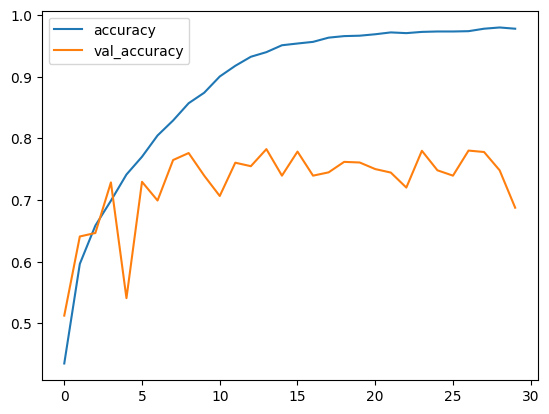

In [59]:
import matplotlib.pyplot as plt

metrics[['accuracy','val_accuracy']].plot()
plt.show()

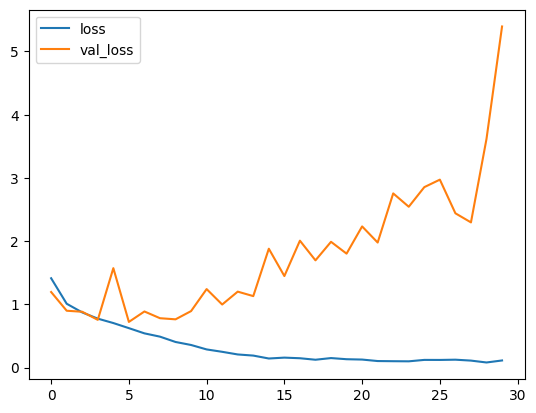

In [60]:
metrics[['loss','val_loss']].plot()
plt.show()

In [61]:
test_model = keras.models.load_model("CNN_benchmark.keras")
test_model.evaluate(test_dataset)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7554 - loss: 0.6687


[0.7020575404167175, 0.7486666440963745]

Current benchmark is at 74.87%. It also appears we begin overfitting around epoch 10. 

## Question 3

Transfer Learning - Feature Extraction

In this we will be using the VGG16 architecture.

In [100]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [101]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### 1. 

generate features and labels for the train, validation, and test datasets

In [102]:
# extracting the VGG16 features and corresponding labels
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images) # this scales pixel values to an appropriate range.
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

In [106]:
test_features.shape

(3000, 5, 5, 512)

In [107]:
test_labels.shape

(3000,)

### 2.

Create your own neural network (the input is the feature map created by the VGG16)

In [119]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [120]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,639,302 (6.25 MB)

 Trainable params: 1,639,302 (6.25 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
modelcheckpoint  = ModelCheckpoint(filepath="CNN_feature_extraction_vgg16.keras",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

### 3. 

Train your model using model.fit(). Make sure to save the best one by adding modelcheckpoint to your callback list. 

In [122]:
history = model.fit(train_features,train_labels,
                              epochs=20, validation_data=(val_features, val_labels),
                              callbacks=callback_list)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8038 - loss: 11.3484 - val_accuracy: 0.8690 - val_loss: 8.5027
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9061 - loss: 4.7500 - val_accuracy: 0.8997 - val_loss: 6.7122
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9300 - loss: 2.8595 - val_accuracy: 0.9053 - val_loss: 6.1194
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9512 - loss: 1.8096 - val_accuracy: 0.8913 - val_loss: 7.1260
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9539 - loss: 1.4708 - val_accuracy: 0.8597 - val_loss: 7.4320
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9597 - loss: 1.0401 - val_accuracy: 0.9073 - val_loss: 5.8471
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9650 - loss: 0.8934 - val_accuracy: 0.9110 - val_loss: 5.9855
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9744 - loss: 0.5345 - val_accuracy: 

### 4.

Plot the loss vs epoch graph as well as the accuracy vs epoch graph.

In [127]:
metrics = pd.DataFrame(history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.846833,10.188653,0.869000,8.502740
1,0.907833,4.803845,0.899667,6.712187
2,0.929333,2.952935,0.905333,6.119432
3,0.949167,1.867091,0.891333,7.126039
4,0.953167,1.508662,0.859667,7.431989


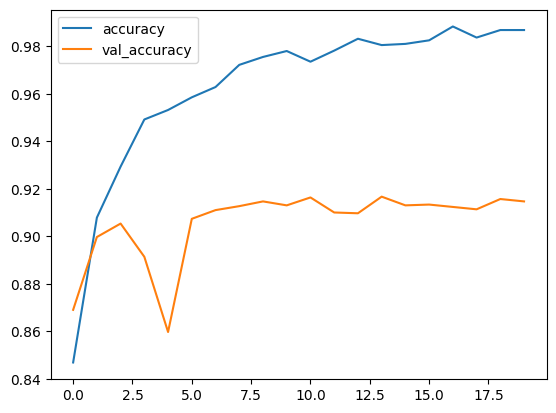

In [128]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

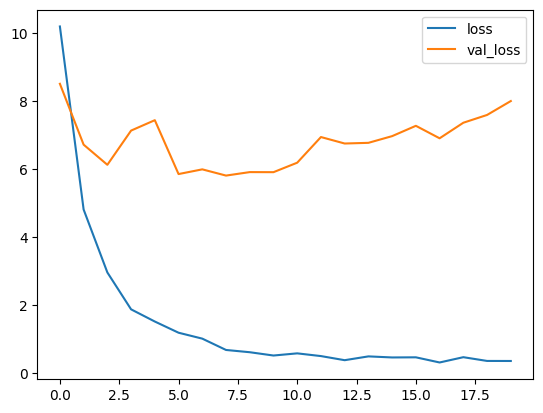

In [129]:
metrics[['loss','val_loss']].plot()
plt.show()

### 5. 

Report the test set accuracy of your best performing model (this is why we use the modelcheckpoint)

In [126]:
test_model = keras.models.load_model("CNN_feature_extraction_vgg16.keras")
test_model.evaluate(test_features, test_labels)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8990 - loss: 7.7192


[7.383694171905518, 0.902999997138977]

Our accuracy improved to 90.3%

This is a good improvement from the previous model

## Question 4

Transfer Learning - Fine Tuning

### 1. 

Unfreeze the last 4 layers. This could be different depending on the model we choose (vgg16, exception or etc)

In [130]:
# unfreezing the last 4 layers
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [131]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### 2. 

Create your own neural network. The input of this dense network is the same as your original input image because we are fine tuning our own model

In [133]:
inputs = keras.Input(shape=(180, 180, 3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), # we pick very low learning rate to limit the magnitude of changes we make to the last 3 conv layers we are fine-tuning.
              metrics=["accuracy"])

### 3. 

Report the model.summary(). How many parameters does NN architecture have? How many of them are trainable and how many are non-trainable?

In [134]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 180, 180)  │          0 │ input_layer_11[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 180, 180)  │          0 │ input_layer_11[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 180, 180)  │          0 │ input_layer_11[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 180, 180,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 180, 180,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 5, 5, 512) │ 14,714,688 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 12800)     │          0 │ vgg16[1][0]       │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 128)       │  1,638,528 │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 128)       │          0 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 6)         │        774 │ dropout_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,353,990 (62.39 MB)

 Trainable params: 16,353,990 (62.39 MB)

 Non-trainable params: 0 (0.00 B)

The total number of params are 16,353,990
The trainable params is 16,353,990
and the non-trainable params total 0

In [136]:
modelcheckpoint  = ModelCheckpoint(filepath="CNN_fine_tuning_vgg16.keras",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

### 4. 

Train your model using model.fit(). Make sure you save the best one by adding the modelcheckpoint to callback list

In [137]:
history = model.fit(train_dataset,
                              epochs=30, validation_data=validation_dataset,
                              callbacks=callback_list)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 315ms/step - accuracy: 0.3506 - loss: 4.8052 - val_accuracy: 0.7777 - val_loss: 0.6384
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 241ms/step - accuracy: 0.7419 - loss: 0.7065 - val_accuracy: 0.8643 - val_loss: 0.4195
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 46s 244ms/step - accuracy: 0.8483 - loss: 0.4437 - val_accuracy: 0.8827 - val_loss: 0.3618
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 47s 248ms/step - accuracy: 0.8876 - loss: 0.3199 - val_accuracy: 0.8987 - val_loss: 0.3468
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 237ms/step - accuracy: 0.9206 - loss: 0.2465 - val_accuracy: 0.8957 - val_loss: 0.3582
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 239ms/step - accuracy: 0.9409 - loss: 0.1855 - val_accuracy: 0.8990 - val_loss: 0.3779
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 239ms/step - accuracy: 0.9538 - loss: 0.1421 - val_accuracy: 0.8977 - val_loss: 0.3914
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 239ms/step - accuracy: 0.9651 - loss: 0

### 5. 

Plot the loss vs epoch graph as wel las accuracy vs epoch graph

In [138]:
metrics = pd.DataFrame(history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.492833,2.220750,0.777667,0.638391
1,0.782833,0.611618,0.864333,0.419494
2,0.860333,0.399980,0.882667,0.361754
3,0.899667,0.287754,0.898667,0.346823
4,0.926333,0.220786,0.895667,0.358174


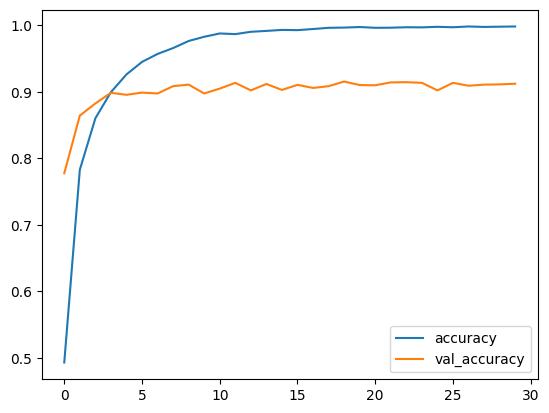

In [139]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

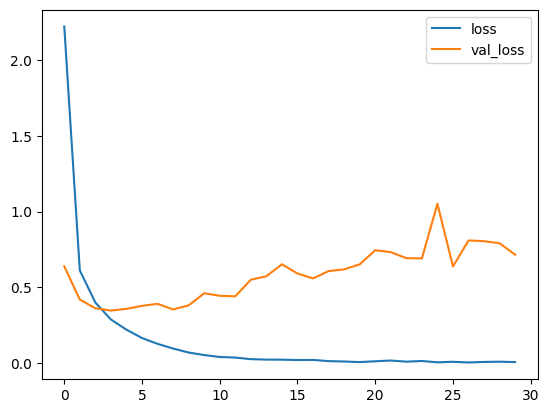

In [140]:
metrics[['loss','val_loss']].plot()
plt.show()

### 6. 

Report the test set accuracy of your best performing model. Were you able to beat the benchmark? How about beating the feature extraction model?

In [141]:
test_model = keras.models.load_model("CNN_fine_tuning_vgg16.keras")
test_model.evaluate(test_dataset)

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8969 - loss: 0.3656


[0.36761561036109924, 0.8999999761581421]

The accuracy is at 89.99% and did not outperform the feature extraction model.

## Question 5

Visualize 9 images from the test set that the model missclassified. You should use either the basic CNN or the fine tuned vgg16 model. What is your accuracy (as a human being) on these 9 missclassified images by the machine?

In [194]:
model = keras.models.load_model("CNN_fine_tuning_vgg16.keras")
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 180, 180)  │          0 │ input_layer_11[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 180, 180)  │          0 │ input_layer_11[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 180, 180)  │          0 │ input_layer_11[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_6 (Stack)     │ (None, 180, 180,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 180, 180,  │          0 │ stack_6[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 5, 5, 512) │ 14,714,688 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 12800)     │          0 │ vgg16[0][0]       │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 128)       │  1,638,528 │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 128)       │          0 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 6)         │        774 │ dropout_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 32,707,982 (124.77 MB)

 Trainable params: 16,353,990 (62.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,353,992 (62.39 MB)

In [195]:
test_dataset.class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

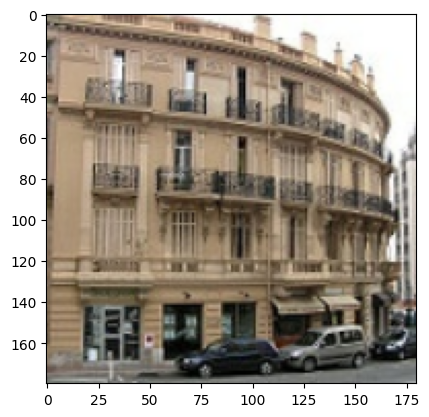

In [196]:
# every single time that you run tf.data.Data, it will shuffle the data.
for image, _ in test_dataset.take(1): # take(N) allows to sample N batches from the dataset.
  plt.imshow(image[1].numpy().astype("uint8"))

In [197]:
# Get predictions and true labels, store images
for x, y in test_dataset:
    y_test = np.concatenate([y_test, y])
    # Predict probabilities for each batch
    predictions = model.predict(x, verbose=0)
    # Convert probabilities to class labels using argmax
    predicted_classes = np.argmax(predictions, axis=1)
    # Append predicted classes
    pred_test = np.concatenate([pred_test, predicted_classes])
    # Store the images
    all_images.append(x)

In [198]:
# Convert list of images to numpy array
test_images = np.concatenate(all_images)
print("Test images shape:", test_images.shape)

Test images shape: (9000, 180, 180, 3)


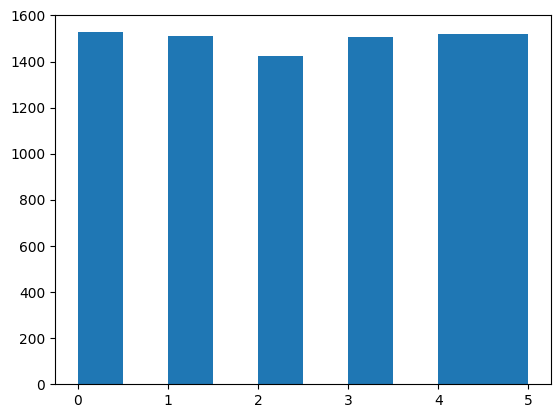

In [206]:
plt.hist(pred_test)
plt.show()

In [207]:
from sklearn.metrics import classification_report,confusion_matrix

In [208]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      1500
         1.0       0.97      0.98      0.98      1500
         2.0       0.84      0.80      0.82      1500
         3.0       0.84      0.85      0.84      1500
         4.0       0.92      0.93      0.92      1500
         5.0       0.91      0.92      0.92      1500

    accuracy                           0.90      9000
   macro avg       0.90      0.90      0.90      9000
weighted avg       0.90      0.90      0.90      9000



In [209]:
confusion_matrix(y_test,pred_test)

array([[1392,    0,    0,    3,    9,   96],
       [   0, 1467,    0,   21,    6,    6],
       [  12,   21, 1194,  198,   60,   15],
       [   6,    9,  171, 1269,   42,    3],
       [  18,    3,   54,   15, 1395,   15],
       [  99,    9,    3,    0,    6, 1383]])

In [210]:
misclass = y_test !=pred_test

In [211]:
misclassified_images = [i for i, x in enumerate(misclass) if x==True]
misclassified_images[:10]

[1, 5, 15, 17, 19, 27, 32, 39, 57, 61]

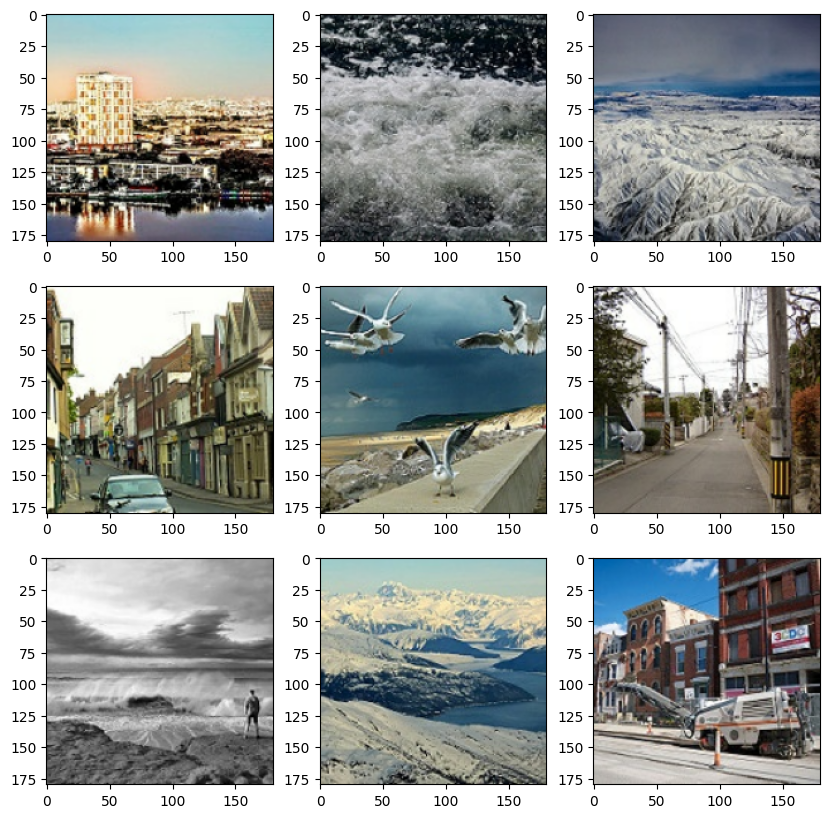

In [213]:
plt.figure(figsize=(10,10))
for i , number in enumerate(misclassified_images[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(test_images[number].astype("uint8"))
plt.show()

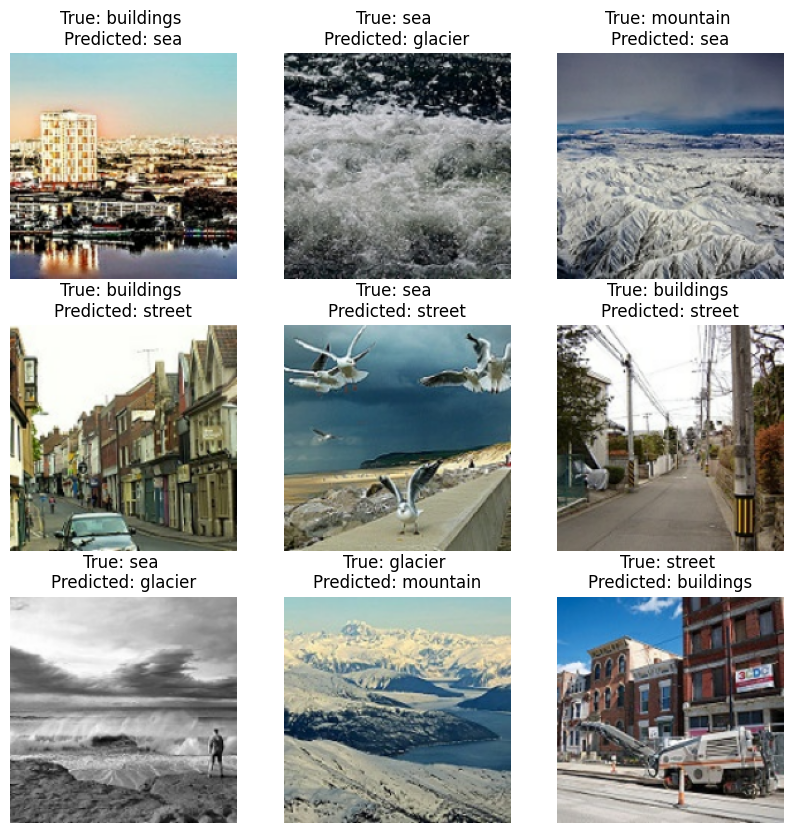

In [214]:
# Visualize the first 9 misclassified images
plt.figure(figsize=(10,10))
for i, number in enumerate(misclassified_images[:9]):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[number].astype("uint8"))
    plt.title(f"True: {test_dataset.class_names[int(y_test[number])]} \nPredicted: {test_dataset.class_names[int(pred_test[number])]}")
    plt.axis("off")
plt.show()